In [1]:
from discopy import *

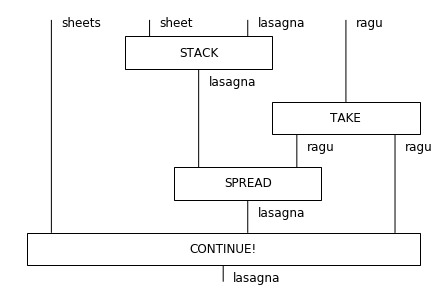

In [4]:
sheet, ragu, lasagna, bang_sheet = Ty('sheet'), Ty('ragu'), Ty('lasagna'), Ty('sheets')

spread = Box('SPREAD', lasagna @ ragu, lasagna)
bang_spread = Box('CONTINUE!', bang_sheet @ lasagna @ ragu, lasagna)
take = Box('TAKE', ragu, ragu @ ragu)
swap = Box('SWAP', sheet @ ragu, ragu @ sheet)
stack = Box('STACK', sheet @ lasagna, lasagna)
draw = Box('DRAW', bang_sheet, bang_sheet @ sheet)

diagram = Id(bang_sheet @ sheet @ lasagna @ ragu) >> Id(bang_sheet) @ stack @ take\
            >> Id(bang_sheet) @ spread @ Id(ragu) >> bang_spread
diagram.draw(aspect='auto')

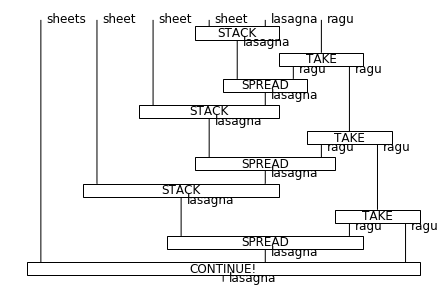

In [5]:
ob = {ragu: ragu, bang_sheet: bang_sheet @ sheet, sheet: sheet, lasagna: lasagna}
ar = {spread: spread, bang_spread: diagram, take: take, swap: swap, stack: stack, draw: draw}
Next = Functor(ob, ar)
thick_lasagna = Next(Next(Next(bang_spread)))
thick_lasagna.draw(aspect='auto')